In [1]:
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from linearmodels import PanelOLS

C:\Users\nakhonpathompc\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,team,player,position,tour,place,prize,start,end,startelo32,startelo64,...,endelo32,endelo64,endglickorating,endglickomu,endglickophi,endglickosigma,endglicko2rating,endglicko2mu,endglicko2phi,endglicko2sigma
0,Infamous,Kotar? Hayama,1,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
1,Infamous,Papita,2,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
2,Infamous,StingeR,3,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
3,Infamous,Scofield,4,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
4,Infamous,Masoku,5,Galaxy Battles II: Emerging Worlds,7,"$20,000",2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN


In [4]:
df['prize'] = df['prize'].replace('[\$,]', '', regex=True).astype(float)
df.player = df.player.replace(r'\W+', '', regex=True).str.lower()
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
print(df.dtypes)
df.head()

team                          object
player                        object
position                       int64
tour                          object
place                          int64
prize                        float64
start                 datetime64[ns]
end                   datetime64[ns]
startelo32                   float64
startelo64                   float64
startglickorating            float64
startglickomu                float64
startglickophi               float64
startglickosigma             float64
startglicko2rating           float64
startglicko2mu               float64
startglicko2phi              float64
startglicko2sigma            float64
endelo32                     float64
endelo64                     float64
endglickorating              float64
endglickomu                  float64
endglickophi                 float64
endglickosigma               float64
endglicko2rating             float64
endglicko2mu                 float64
endglicko2phi                float64
e

,team,player,position,tour,place,prize,start,end,startelo32,startelo64,...,endelo32,endelo64,endglickorating,endglickomu,endglickophi,endglickosigma,endglicko2rating,endglicko2mu,endglicko2phi,endglicko2sigma
0,Infamous,kotarhayama,1,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
1,Infamous,papita,2,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
2,Infamous,stinger,3,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
3,Infamous,scofield,4,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN
4,Infamous,masoku,5,Galaxy Battles II: Emerging Worlds,7,20000.0,2018-01-19,2018-01-21,1116.266143,1172.69492,...,1114.677102,1170.334653,1646.254466,1840.23761,NaN,77.593258,1596.919637,1728.907874,52.795295,NaN


In [5]:
pool = df.groupby(['tour', 'team']).first()['prize'].groupby('tour').sum().reset_index().rename(columns={'prize': 'pool'})
pool.head()

,tour,pool
0,2013 WPC ACE Dota 2 League,254534.0
1,2015 Red Bull Battle Grounds: Dota 2,88295.0
2,AMD Premier League Season 1,6500.0
3,AMD Premier League Season 2,7000.0
4,AMD SAPPHIRE Dota PIT League,300000.0


In [6]:
df = pd.merge(df, pool, how='left', on=['tour'])

In [7]:
df2 = pd.read_csv('dob.csv', encoding = "ISO-8859-1")
df2.head()

,country,player,name,dob
0,Russia,.Ark,Egor Zhabotinskii,1997-07-07
1,Denmark,13abyKnight,Jon Andersen,1992-06-15
2,Canada,1437,Sivatheeban Sivanathapillai,NaN
3,China,290,Zeng Chen,NaN
4,United Kingdom,2GD,James Harding,1982-12-29


In [8]:
df2.player = df2.player.replace(r'\W+', '', regex=True).str.lower()
df2.dob = pd.to_datetime(df2.dob)
print(df2.dtypes)
df2.head()

country            object
player             object
name               object
dob        datetime64[ns]
dtype: object


,country,player,name,dob
0,Russia,ark,Egor Zhabotinskii,1997-07-07
1,Denmark,13abyknight,Jon Andersen,1992-06-15
2,Canada,1437,Sivatheeban Sivanathapillai,NaT
3,China,290,Zeng Chen,NaT
4,United Kingdom,2gd,James Harding,1982-12-29


In [9]:
df = pd.merge(df, df2, how='left', on=['player'])

In [10]:
ra = df[['team', 'player', 'dob', 'position', 'tour', 'place', 'prize', 'pool', 'start', 'end', 'startelo64', 'endelo64']]
print(len(ra))
print(len(ra.dropna()))
ra = ra.dropna().sort_values('start').reset_index().drop('index', axis=1)

9240
4721


In [11]:
ra = ra.rename(columns={'startelo64': 'srt', 'endelo64': 'ert'})
ra.head()

,team,player,dob,position,tour,place,prize,pool,start,end,srt,ert
0,Mousesports,kuroky,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942
1,Mousesports,sexybamboe,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942
2,Counter Logic Gaming,pajkatt,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795
3,Counter Logic Gaming,misery,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795
4,Counter Logic Gaming,lacoste,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795


In [12]:
ra['age'] = ra.start.dt.year - ra.dob.dt.year

In [13]:
ra.head()

,team,player,dob,position,tour,place,prize,pool,start,end,srt,ert,age
0,Mousesports,kuroky,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,20
1,Mousesports,sexybamboe,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,20
2,Counter Logic Gaming,pajkatt,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,20
3,Counter Logic Gaming,misery,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,21
4,Counter Logic Gaming,lacoste,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,25


In [14]:
ti = ra[ra['tour'].str[:17] == 'The International'].groupby('tour').first()[['pool', 'start', 'end']]
ti

,pool,start,end
tour,,,
The International 2012,1775000.0,2012-08-26,2012-09-02
The International 2013,3219309.0,2013-08-02,2013-08-11
The International 2014,10967674.0,2014-07-08,2014-07-21
The International 2015,17600281.0,2015-07-27,2015-08-08
The International 2016,13916298.0,2016-08-02,2016-08-13
The International 2017,24687919.0,2017-08-02,2017-08-12


In [15]:
ra['weight'] = ra['pool']
for i in range(0, 5):
    ra.loc[(ra['start'] >= ti['start'].iloc[i]) & (ra['start'] <= ti['start'].iloc[i+1]), 'weight'] = ra[(ra['start'] >= ti['start'].iloc[i]) & (ra['start'] <= ti['start'].iloc[i+1])]['pool'].apply(np.log) / np.log(ti['pool'].iloc[i])

#Only before ti7
ra = ra[ra['start'] < ti['start'].iloc[5]]

In [16]:
init = ra.sort_values('start').groupby('player').first()['srt'].reset_index().rename(columns={'srt': 'init'})
init.head()

,player,init
0,,1006.800604
1,33,1013.682296
2,4dr,924.234998
3,7ckngmad,1022.550958
4,9pasha,1315.094989


In [17]:
ra = pd.merge(ra, init, how='left', on=['player'])

In [18]:
ra['drt'] = ra.ert - ra.srt
ra.head()

,team,player,dob,position,tour,place,prize,pool,start,end,srt,ert,age,weight,init,drt
0,Mousesports,kuroky,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,20,1.0,1054.248131,-199.921189
1,Mousesports,sexybamboe,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1054.248131,854.326942,20,1.0,1054.248131,-199.921189
2,Counter Logic Gaming,pajkatt,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,20,1.0,1269.147739,-311.672944
3,Counter Logic Gaming,misery,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,21,1.0,1269.147739,-311.672944
4,Counter Logic Gaming,lacoste,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-08-26,2012-09-02,1269.147739,957.474795,25,1.0,1269.147739,-311.672944


In [19]:
cumsums = ra[['player', 'start', 'drt']].groupby(['player', 'start']).sum().groupby(level=0).cumsum()
ra = ra.set_index(['player', 'start'])
ra['cumrt'] = cumsums
ra = ra.reset_index()
ra.head()

,player,start,team,dob,position,tour,place,prize,pool,end,srt,ert,age,weight,init,drt,cumrt
0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,20,1.0,1054.248131,-199.921189,-199.921189
1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,20,1.0,1054.248131,-199.921189,-199.921189
2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,20,1.0,1269.147739,-311.672944,-311.672944
3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,21,1.0,1269.147739,-311.672944,-311.672944
4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,25,1.0,1269.147739,-311.672944,-311.672944


In [20]:
ra['crt'] = (ra.weight * ra.cumrt) + ra.init
ra.head()

,player,start,team,dob,position,tour,place,prize,pool,end,srt,ert,age,weight,init,drt,cumrt,crt
0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,20,1.0,1054.248131,-199.921189,-199.921189,854.326942
1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1054.248131,854.326942,20,1.0,1054.248131,-199.921189,-199.921189,854.326942
2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,20,1.0,1269.147739,-311.672944,-311.672944,957.474795
3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,21,1.0,1269.147739,-311.672944,-311.672944,957.474795
4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,1269.147739,957.474795,25,1.0,1269.147739,-311.672944,-311.672944,957.474795


In [21]:
ra = ra.drop(['srt', 'ert', 'init', 'drt', 'cumrt'], axis=1)
ra.tail()

,player,start,team,dob,position,tour,place,prize,pool,end,age,weight,crt
4249,kuroky,2017-07-21,Team Liquid,1992-10-28,5,DreamLeague Season 7,1,80000.0,175000.0,2017-07-22,25,0.733957,1258.398246
4250,alohadance,2017-07-21,Vega Squadron,1997-09-15,1,DreamLeague Season 7,4,20000.0,175000.0,2017-07-22,20,0.733957,1281.273997
4251,g,2017-07-21,Vega Squadron,1992-04-16,2,DreamLeague Season 7,4,20000.0,175000.0,2017-07-22,25,0.733957,1098.113645
4252,afterlife,2017-07-21,Vega Squadron,1997-03-13,3,DreamLeague Season 7,4,20000.0,175000.0,2017-07-22,20,0.733957,1084.259969
4253,matumbaman,2017-07-21,Team Liquid,1995-03-03,1,DreamLeague Season 7,1,80000.0,175000.0,2017-07-22,22,0.733957,1452.481802


In [22]:
ra[['player', 'team', 'crt', 'end']].groupby('player').last().sort_values('crt', ascending=False)

,team,crt,end
player,,,
ppd,Evil Geniuses,2628.106510,2016-08-13
n0tail,OG,2335.269642,2017-07-09
yao,LGD Gaming,2333.073036,2017-07-09
fly,OG,2232.388384,2017-07-09
ddc,LGD.Forever Young,2124.933902,2017-07-09
faith,Newbee,2103.125714,2017-07-09
era,Alliance,2002.580164,2017-07-09
sumail,Evil Geniuses,1974.943804,2017-05-28
yyf,Invictus Gaming,1970.070955,2014-07-21


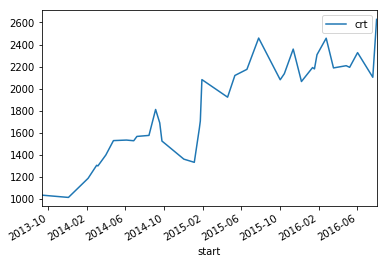

In [23]:
ra[ra['player'] == 'ppd'][['start', 'crt']].set_index('start').plot()

In [24]:
ra.head()

,player,start,team,dob,position,tour,place,prize,pool,end,age,weight,crt
0,kuroky,2012-08-26,Mousesports,1992-10-28,5,The International 2012,7,25000.0,1775000.0,2012-09-02,20,1.0,854.326942
1,sexybamboe,2012-08-26,Mousesports,1992-01-20,3,The International 2012,7,25000.0,1775000.0,2012-09-02,20,1.0,854.326942
2,pajkatt,2012-08-26,Counter Logic Gaming,1992-09-19,1,The International 2012,7,25000.0,1775000.0,2012-09-02,20,1.0,957.474795
3,misery,2012-08-26,Counter Logic Gaming,1991-07-14,2,The International 2012,7,25000.0,1775000.0,2012-09-02,21,1.0,957.474795
4,lacoste,2012-08-26,Counter Logic Gaming,1987-11-22,3,The International 2012,7,25000.0,1775000.0,2012-09-02,25,1.0,957.474795


In [25]:
ra = ra[ra['player'] != '']
ra = ra[(ra['age'] > 18) & (ra['age'] < 28)]

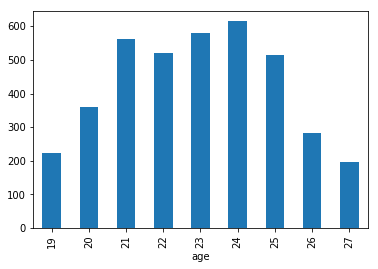

In [26]:
#age frequency
ra.groupby('age').size().plot(kind='bar')

In [27]:
ra = pd.merge(ra, ra.groupby('player').size().reset_index().reset_index().drop(0,axis=1).rename(columns={'index': 'id'}), how='left', on=['player'])

In [28]:
#analysis
ra = ra.set_index(['id', 'start']).sort_index()
ra['agesq'] = ra.age * ra.age

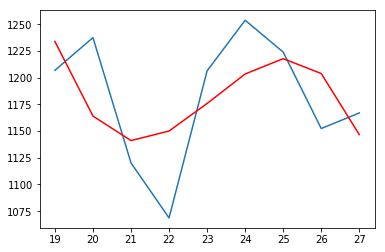

In [29]:
y = ra.groupby('age').mean()['crt'].reset_index()['crt']
x = ra.groupby('age').mean()['crt'].reset_index()['age']
plt.plot(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)), 'r')

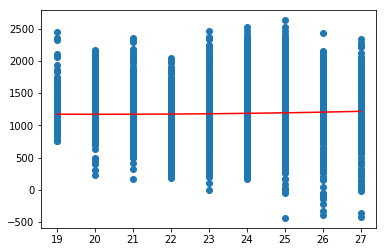

In [30]:
y = ra['crt']
x = ra['age']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)), 'r')

In [31]:
ra['const'] = 1

In [32]:
y = ra['crt']
x = ra[['age', 'agesq', 'const']]
mod = sm.OLS(y, x)
res = mod.fit()

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    crt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.959
Date:                Thu, 25 Jan 2018   Prob (F-statistic):              0.141
Time:                        20:41:01   Log-Likelihood:                -28521.
No. Observations:                3857   AIC:                         5.705e+04
Df Residuals:                    3854   BIC:                         5.707e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -38.6779     58.924     -0.656      0.512    -154.203      76.847
agesq          0.9609      1.283      0.749      0.454      -1.555       3.477
const       1559.4657    672.167      2.320      0.020     241.629    2877.302
==============================================================================
Omnibus:                      126.265   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.003
Skew:                           0.200   Prob(JB):                     2.34e-59
Kurtosis:                       4.233   Cond. No.                     5.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#core vs sup
cor = ra[ra['position'] <= 3]
sup = ra[ra['position'] > 3]

In [36]:
y = cor['crt']
x = cor[['age', 'agesq', 'const']]
mod = sm.OLS(y, x)
res = mod.fit()

In [37]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    crt   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.259
Date:                Thu, 25 Jan 2018   Prob (F-statistic):            0.00526
Time:                        20:41:38   Log-Likelihood:                -16773.
No. Observations:                2272   AIC:                         3.355e+04
Df Residuals:                    2269   BIC:                         3.357e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age         -212.9721     78.391     -2.717      0.007    -366.697     -59.247
agesq          4.7967      1.712      2.801      0.005       1.439       8.155
const       3510.3414    891.738      3.937      0.000    1761.633    5259.050
==============================================================================
Omnibus:                       80.985   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.757
Skew:                          -0.063   Prob(JB):                     2.58e-49
Kurtosis:                       4.532   Cond. No.                     5.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

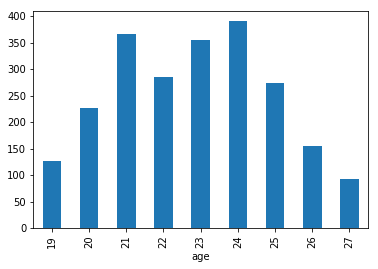

In [38]:
cor.groupby('age').size().plot(kind='bar')

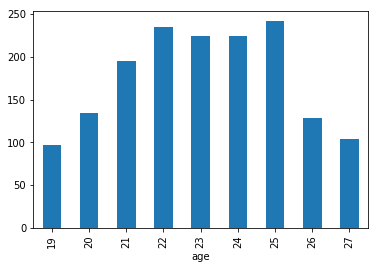

In [39]:
sup.groupby('age').size().plot(kind='bar')

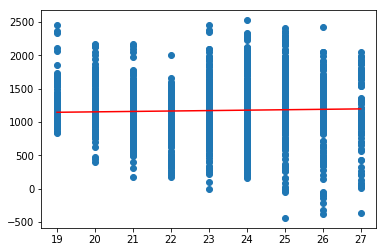

In [40]:
y = cor['crt']
x = cor['age']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r')

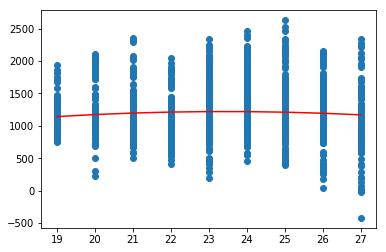

In [41]:
y = sup['crt']
x = sup['age']
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)), 'r')